# PLE02: Preparación de los datos

## Análisis EDA simple

En este notebook se implementarán las funciones necesarias para hacer una preparación y análisis de los datos mediante un EDA

In [1]:
# Importación de las bibliotecas necesarias 
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler



#### Carga de los datos

In [2]:
# Carga de los datos del csv
CSV_FILE = 'proy_escuela_dev.csv' 
df = pd.read_csv(CSV_FILE, index_col = 0)

# Verificar la estructura del dataframe
print(f"Dimensiones del dataframe completo {df.shape}")

# Inspección de los primeros registros del dataframe 
print("Primeros registros del dataset completo")
print(df.head())


Dimensiones del dataframe completo (595, 40)
Primeros registros del dataset completo
                                                 dni    campus  \
id_estudiante_proy                                               
511                 3090960be7fa45d5a21095a83ff9c1da  A Coruña   
255                 efb6ca5df4824879b8b49d892d792e55  A Coruña   
377                 816fcb104f8242aa802a5c10a32d40da      Vigo   
642                 c8b5aff68b524a139106d3a98b4d5cbe  A Coruña   
318                 66ddb021477d4893bb9408e273c58aef  A Coruña   

                                          titulacion  \
id_estudiante_proy                                     
511                 f1bfc2083f3c4ebcbcd8b2a48321f02a   
255                 d23620300d7d42209fd7f4fc2fe34ce6   
377                 fcfc3c42ec3e41acb44fd74494985d8b   
642                 848dd3d4434b42dfa9a886213834afc4   
318                 26878c9a3e2c4c349f1ae828b3863eac   

                                              nombre  \
id_

#### Estructura de los datos
1. Conjunto de los datos
2. Tipos de los datos


In [3]:
# Número de filas y columnas

num_filas, num_columnas = df.shape[0] , df.shape[1]

mensaje = f"""
\n ****** NUMERO DE FILAS/COLUMNAS ******\n

      El numero de filas es de {num_filas + 1} \n
     El numero de columnas es de {num_columnas + 1} 

"""
print(mensaje)


# Ver nombre de las columnas 
print("\n ****** NOMBRES DE LAS COLUMNAS ******\n")
print(df.columns)




 ****** NUMERO DE FILAS/COLUMNAS ******


      El numero de filas es de 596 

     El numero de columnas es de 41 



 ****** NOMBRES DE LAS COLUMNAS ******

Index(['dni', 'campus', 'titulacion', 'nombre', 'apellidos', 'sexo', 'edad',
       'direccion', 'telefono1', 'telefono2', 'email', 'fecha_nacimiento',
       'entorno_vivienda', 'tamano_familia', 'independizado_padres',
       'educacion_madre', 'educacion_padre', 'ocupacion_madre',
       'ocupacion_padre', 'razon_matricula', 'interes_educacion_superior',
       'internet_casa', 'tiempo_viaje', 'tiempo_estudio', 'apoyo_escolar',
       'apoyo_familiar', 'actividades', 'relacion_romantica',
       'relacion_familiar', 'tiempo_libre', 'salir_amigos',
       'consumo_alcohol_entre_semana', 'consumo_alcohol_fin_de_semana',
       'salud', 'suspensos', 'faltas', 'nota1', 'nota2', 'nota3',
       'usuario_alta_datos'],
      dtype='object')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 595 entries, 511 to 556
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   dni                            595 non-null    object 
 1   campus                         595 non-null    object 
 2   titulacion                     595 non-null    object 
 3   nombre                         595 non-null    object 
 4   apellidos                      595 non-null    object 
 5   sexo                           567 non-null    object 
 6   edad                           587 non-null    float64
 7   direccion                      595 non-null    object 
 8   telefono1                      595 non-null    object 
 9   telefono2                      595 non-null    object 
 10  email                          595 non-null    object 
 11  fecha_nacimiento               595 non-null    object 
 12  entorno_vivienda               587 non-null    object

### Eliminación de registros nulos

Debido a que tenemos un conjunto de datos lo suficientemente grande, podemos eliminar los registros que en algunas de sus variables presente algún valor nulo.

In [5]:
# Mostrar el número de filas que tienen al menos un valor nulo
num_filas_con_nulos = df.isnull().any(axis=1).sum()
print(f"Número de filas con al menos un valor nulo: {num_filas_con_nulos}")

# Eliminar las filas con valores nulos
df = df.dropna()

# Mostrar el número de filas restantes en el DataFrame
num_filas_restantes = df.shape[0]
print(f"Número de filas restantes después de eliminar los nulos: {num_filas_restantes}")

Número de filas con al menos un valor nulo: 47
Número de filas restantes después de eliminar los nulos: 548


### Variables a eliminar antes de la matriz de correlación

Datos sensibles que han sido encriptados como el nombre, apellidos, teléfono, etc. se pueden eliminar porque no añaden utilidad al futuro modelo de predicción. Además, aunque fuesen datos numéricos y válidos, no resulta significativo para predecir el valor de las calificaciones de un alumno. 

In [6]:
columnas_encriptadas = ['dni', 'titulacion', 'nombre', 'apellidos', 'direccion', 'telefono1', 'telefono2', 'email', 'fecha_nacimiento', 'usuario_alta_datos']
columnas_existentes = [col for col in columnas_encriptadas if col in df.columns]
df = df.drop(columns=columnas_existentes)

df.head()

,campus,sexo,edad,entorno_vivienda,tamano_familia,independizado_padres,educacion_madre,educacion_padre,ocupacion_madre,ocupacion_padre,...,tiempo_libre,salir_amigos,consumo_alcohol_entre_semana,consumo_alcohol_fin_de_semana,salud,suspensos,faltas,nota1,nota2,nota3
id_estudiante_proy,,,,,,,,,,,,,,,,,,,,,
511,A Coruña,V,15.0,urbano,<=3,independizado,4.0,3.0,profesor,servicios,...,4.0,3.0,1.0,1.0,4.0,0.0,0.0,14.0,14.0,14.0
377,Vigo,M,18.0,rural,>3,independizado,2.0,2.0,servicios,otro,...,2.0,1.0,1.0,1.0,4.0,0.0,5.0,14.0,14.0,15.0
642,A Coruña,V,17.0,urbano,>3,independizado,3.0,2.0,servicios,servicios,...,5.0,5.0,2.0,4.0,5.0,3.0,2.0,8.0,8.0,7.0
318,A Coruña,M,18.0,urbano,>3,independizado,4.0,4.0,salud,salud,...,4.0,4.0,1.0,1.0,4.0,1.0,2.0,14.0,12.0,13.0
426,A Coruña,V,19.0,urbano,>3,independizado,4.0,2.0,salud,otro,...,4.0,4.0,1.0,1.0,1.0,0.0,9.0,11.0,10.0,10.0


### Renombramiento de algunas varibles y cambio de las respuestas a valores booleanos

In [7]:
# Renombramos tañano_familia a es_numerosa
# Consideramos que familia numerosa en este caso es a partir de 3 integrantes
# ya que no podemos diferenciar entre tutores y número de hijos en los registros
# ">3"

df.rename(columns={'tamano_familia': 'es_numerosa'}, inplace=True)

# Si la familia tiene 3 o menos miembros el valor se sustituye por 'False'
# Si la familia tiene más de 3 miembros el valor se sustituye por  'True

df['sexo'] = df['sexo'].replace(
    {'V': 0,
     'M': 1}
)

df['es_numerosa'] = df['es_numerosa'].replace(
    {'<=3': 0,
     '>3': 1}
)

df['independizado_padres'] = df['independizado_padres'].replace(
    {'con_nucleo_fam': 0,
     'independizado': 1}
)

df['interes_educacion_superior'] = df['interes_educacion_superior'].replace(
    {'no': 0,
     'False': 0,
     'yes': 1,
     'si': 1,
     'True': 1}
)

df['internet_casa'] = df['internet_casa'].replace(
    {'no': 0,
     'False': 0,
     'yes': 1,
     'si': 1,
     'True': 1}
)

df['apoyo_escolar'] = df['apoyo_escolar'].replace(
    {'no': 0,
     'False': 0,
     'yes': 1,
     'si': 1,
     'True': 1}
)

df['apoyo_familiar'] = df['apoyo_familiar'].replace(
    {'no': 0,
     'False': 0,
     'yes': 1,
     'si': 1,
     'True': 1}
)

df['actividades'] = df['actividades'].replace(
    {'no': 0,
     'False': 0,
     'yes': 1,
     'si': 1,
     'True': 1}
)

df['relacion_romantica'] = df['relacion_romantica'].replace(
    {'no': 0,
     'False': 0,
     'yes': 1,
     'si': 1,
     'True': 1}
)

df.head()


/tmp/ipykernel_40971/2490287407.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sexo'] = df['sexo'].replace(
/tmp/ipykernel_40971/2490287407.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['es_numerosa'] = df['es_numerosa'].replace(
/tmp/ipykernel_40971/2490287407.py:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no

,campus,sexo,edad,entorno_vivienda,es_numerosa,independizado_padres,educacion_madre,educacion_padre,ocupacion_madre,ocupacion_padre,...,tiempo_libre,salir_amigos,consumo_alcohol_entre_semana,consumo_alcohol_fin_de_semana,salud,suspensos,faltas,nota1,nota2,nota3
id_estudiante_proy,,,,,,,,,,,,,,,,,,,,,
511,A Coruña,0,15.0,urbano,0,1,4.0,3.0,profesor,servicios,...,4.0,3.0,1.0,1.0,4.0,0.0,0.0,14.0,14.0,14.0
377,Vigo,1,18.0,rural,1,1,2.0,2.0,servicios,otro,...,2.0,1.0,1.0,1.0,4.0,0.0,5.0,14.0,14.0,15.0
642,A Coruña,0,17.0,urbano,1,1,3.0,2.0,servicios,servicios,...,5.0,5.0,2.0,4.0,5.0,3.0,2.0,8.0,8.0,7.0
318,A Coruña,1,18.0,urbano,1,1,4.0,4.0,salud,salud,...,4.0,4.0,1.0,1.0,4.0,1.0,2.0,14.0,12.0,13.0
426,A Coruña,0,19.0,urbano,1,1,4.0,2.0,salud,otro,...,4.0,4.0,1.0,1.0,1.0,0.0,9.0,11.0,10.0,10.0


In [8]:
# Número de filas y columnas

num_filas, num_columnas = df.shape[0] , df.shape[1]

mensaje = f"""
\n ****** NUMERO DE FILAS/COLUMNAS ******\n

      El numero de filas es de {num_filas + 1} \n
     El numero de columnas es de {num_columnas + 1} 

"""
print(mensaje)

# Ver nombre de las columnas 
print("\n ****** NOMBRES DE LAS COLUMNAS ******\n")
print(df.columns)




 ****** NUMERO DE FILAS/COLUMNAS ******


      El numero de filas es de 549 

     El numero de columnas es de 31 



 ****** NOMBRES DE LAS COLUMNAS ******

Index(['campus', 'sexo', 'edad', 'entorno_vivienda', 'es_numerosa',
       'independizado_padres', 'educacion_madre', 'educacion_padre',
       'ocupacion_madre', 'ocupacion_padre', 'razon_matricula',
       'interes_educacion_superior', 'internet_casa', 'tiempo_viaje',
       'tiempo_estudio', 'apoyo_escolar', 'apoyo_familiar', 'actividades',
       'relacion_romantica', 'relacion_familiar', 'tiempo_libre',
       'salir_amigos', 'consumo_alcohol_entre_semana',
       'consumo_alcohol_fin_de_semana', 'salud', 'suspensos', 'faltas',
       'nota1', 'nota2', 'nota3'],
      dtype='object')


In [9]:
# Tipos de datos
print("\n ******TIPOS DE DATOS****** \n")
print(df.dtypes)


 ******TIPOS DE DATOS****** 

campus                            object
sexo                               int64
edad                             float64
entorno_vivienda                  object
es_numerosa                        int64
independizado_padres               int64
educacion_madre                  float64
educacion_padre                  float64
ocupacion_madre                   object
ocupacion_padre                   object
razon_matricula                   object
interes_educacion_superior        object
internet_casa                     object
tiempo_viaje                     float64
tiempo_estudio                   float64
apoyo_escolar                     object
apoyo_familiar                    object
actividades                       object
relacion_romantica                object
relacion_familiar                float64
tiempo_libre                     float64
salir_amigos                     float64
consumo_alcohol_entre_semana     float64
consumo_alcohol_fin_de_sem

### Cambiar Tipos de Datos

Aunque este cambio no es estrictamente necesario para el desempeño del modelo, ajustar los tipos de datos mejora la consistencia y claridad en el conjunto de datos. Por ejemplo, las edades están actualmente representadas como números de tipo flotante, pero conceptualmente son valores enteros, ya que la edad de una persona no se mide con decimales en este caso.

Realizar este ajuste no solo facilita la interpretación de los datos, sino que también puede ayudar a evitar posibles errores al procesarlos en etapas posteriores del análisis o modelado. Por lo tanto, transformamos las edades de tipo flotante a tipo entero para reflejar con mayor precisión la naturaleza discreta de esta variable.

In [10]:
# Cambiar el tipo de dato de la columna 'edad' a entero
df['edad'] = df['edad'].astype(int)
print(df.dtypes)

campus                            object
sexo                               int64
edad                               int64
entorno_vivienda                  object
es_numerosa                        int64
independizado_padres               int64
educacion_madre                  float64
educacion_padre                  float64
ocupacion_madre                   object
ocupacion_padre                   object
razon_matricula                   object
interes_educacion_superior        object
internet_casa                     object
tiempo_viaje                     float64
tiempo_estudio                   float64
apoyo_escolar                     object
apoyo_familiar                    object
actividades                       object
relacion_romantica                object
relacion_familiar                float64
tiempo_libre                     float64
salir_amigos                     float64
consumo_alcohol_entre_semana     float64
consumo_alcohol_fin_de_semana    float64
salud           

#### Estadísticas descriptivas

1. Identificación de variables numéricas y categóricas.

2. Resumen general de las variables numéricas

In [11]:
# Mostrar únicamente las variables categóricas del DataFrame
df_categoricas = df.select_dtypes(include=['object', 'category'])
print(df_categoricas.columns)

Index(['campus', 'entorno_vivienda', 'ocupacion_madre', 'ocupacion_padre',
       'razon_matricula', 'interes_educacion_superior', 'internet_casa',
       'apoyo_escolar', 'apoyo_familiar', 'actividades', 'relacion_romantica'],
      dtype='object')


#### Transformación de variables categóricas numéricas

In [12]:
print("Resumen estadístico de las variables numéricas: \n ", df.describe())

Resumen estadístico de las variables numéricas: 
               sexo        edad  es_numerosa  independizado_padres  \
count  548.000000  548.000000   548.000000            548.000000   
mean     0.585766   16.790146     0.713504              0.875912   
std      0.493039    1.257422     0.452537              0.329983   
min      0.000000   15.000000     0.000000              0.000000   
25%      0.000000   16.000000     0.000000              1.000000   
50%      1.000000   17.000000     1.000000              1.000000   
75%      1.000000   18.000000     1.000000              1.000000   
max      1.000000   22.000000     1.000000              1.000000   

       educacion_madre  educacion_padre  tiempo_viaje  tiempo_estudio  \
count       548.000000       548.000000    548.000000      548.000000   
mean          2.547445         2.313869      1.552920        1.941606   
std           1.118047         1.093453      0.737436        0.833630   
min           0.000000         0.000000     

### Creación de una nueva variable
Hemos creado una nueva variable que resume en una única variable la educación media de los padres. Observando el dataset, notamos que, por lo general, los progenitores tienen niveles de estudio similares. Por esta razón, hemos decidido combinar ambas variables (`educacion_padre` y `educacion_madre`) en una sola para evaluar si esto mejora la explicabilidad del modelo.

Lo mismo aplica para `notas_media`

In [13]:
# Crear una nueva columna 'educacion_media' que sea la media entre 'educacion_padre' y 'educacion_madre'
df['educacion_media'] = (df['educacion_padre'] + df['educacion_madre']) / 2
print(df[['educacion_padre', 'educacion_madre', 'educacion_media']].head())


# Crear una nueva columna 'notas_media' que sea la media entre 'nota1', 'nota2' y 'nota3'
df['notas_media'] = (df['nota1'] + df['nota2'] + df['nota3']) / 3
print(df[['nota1', 'nota2', 'nota3', 'notas_media']].head())


                    educacion_padre  educacion_madre  educacion_media
id_estudiante_proy                                                   
511                             3.0              4.0              3.5
377                             2.0              2.0              2.0
642                             2.0              3.0              2.5
318                             4.0              4.0              4.0
426                             2.0              4.0              3.0
                    nota1  nota2  nota3  notas_media
id_estudiante_proy                                  
511                  14.0   14.0   14.0    14.000000
377                  14.0   14.0   15.0    14.333333
642                   8.0    8.0    7.0     7.666667
318                  14.0   12.0   13.0    13.000000
426                  11.0   10.0   10.0    10.333333


In [14]:
# Seleccionar las columnas con variables numéricas

df_numerico = df.select_dtypes(include = [np.number])

media = df_numerico.mean()
mediana = df_numerico.median()
val_min = df_numerico.min()
val_max = df_numerico.max()
des_estandar= df_numerico.std()
conteo= df_numerico.count()


mensaje_media = f"""A continuación se muestra la Media:
 
{media}
\n
"""
print(mensaje_media)


A continuación se muestra la Media:
 
sexo                              0.585766
edad                             16.790146
es_numerosa                       0.713504
independizado_padres              0.875912
educacion_madre                   2.547445
educacion_padre                   2.313869
tiempo_viaje                      1.552920
tiempo_estudio                    1.941606
relacion_familiar                 3.937956
tiempo_libre                      3.208029
salir_amigos                      3.182482
consumo_alcohol_entre_semana      1.487226
consumo_alcohol_fin_de_semana     2.271898
salud                             3.492701
suspensos                         0.209854
faltas                            3.697080
nota1                            11.562044
nota2                            11.750000
nota3                            12.138686
educacion_media                   2.430657
notas_media                      11.816910
dtype: float64





In [15]:
mensaje_mediana = f"""
Mediana: 
{mediana}
\n

"""

print(mensaje_mediana)


Mediana: 
sexo                              1.000000
edad                             17.000000
es_numerosa                       1.000000
independizado_padres              1.000000
educacion_madre                   2.000000
educacion_padre                   2.000000
tiempo_viaje                      1.000000
tiempo_estudio                    2.000000
relacion_familiar                 4.000000
tiempo_libre                      3.000000
salir_amigos                      3.000000
consumo_alcohol_entre_semana      1.000000
consumo_alcohol_fin_de_semana     2.000000
salud                             4.000000
suspensos                         0.000000
faltas                            2.000000
nota1                            11.000000
nota2                            12.000000
nota3                            12.000000
educacion_media                   2.500000
notas_media                      11.833333
dtype: float64






In [16]:
otros_mensajes = f"""Valor mínimo: 
{val_min}
\n
Valor máximo: 
{val_max}
\n
Desviación estándar: 
{des_estandar}
\n
Conteo de valores no nulos: 
{conteo}"""
print(otros_mensajes)

Valor mínimo: 
sexo                              0.000000
edad                             15.000000
es_numerosa                       0.000000
independizado_padres              0.000000
educacion_madre                   0.000000
educacion_padre                   0.000000
tiempo_viaje                      1.000000
tiempo_estudio                    1.000000
relacion_familiar                 1.000000
tiempo_libre                      1.000000
salir_amigos                      1.000000
consumo_alcohol_entre_semana      1.000000
consumo_alcohol_fin_de_semana     1.000000
salud                             1.000000
suspensos                         0.000000
faltas                            0.000000
nota1                             4.000000
nota2                             0.000000
nota3                             0.000000
educacion_media                   0.000000
notas_media                       1.333333
dtype: float64


Valor máximo: 
sexo                              1.000000
edad   

### Gráficos variables

In [17]:

# # Lista de variables categóricas a graficar
# categorical_vars = [
#     'campus',
#     'entorno_vivienda', 'ocupacion_madre',
#     'ocupacion_padre', 'razon_matricula'
# ]

# # Iterar sobre la lista y crear gráficos
# for var in categorical_vars:
#     counts = df[var].value_counts(normalize=True) * 100
#     fig = px.bar(counts, x=counts.index, y=counts.values, title=f'Distribución de {var.capitalize()} (%)')
#     fig.update_layout(yaxis_title='Porcentaje')
#     fig.show()

#### Distribución de las variables 

In [18]:
# # Seleccionar columnas numéricas
# columnas_numericas = df.select_dtypes(include=['number']).columns

# # Seleccionar columnas categóricas
# columnas_categoricas = df.select_dtypes(include=['object', 'category']).columns

# #Generar gráficos de caja para columnas numéricas
# for columna in columnas_numericas:
#     fig = px.box(df, y=columna)
#     fig.update_layout(
#         title=f'Gráfico de caja para {columna}',
#         yaxis_title=columna,
#         xaxis_title='Categoría'
#     )
#     fig.show()

### Correlación entre variables 

In [19]:
# # Generar gráficos de violín para cada variable
# for col in columnas_numericas:
#     fig = px.violin(
#         df, 
#         y=col, 
#         box=True, 
#         points="all",
#         title=f'Gráfico de violín para {col}',
#         labels={col: col}
#     )
#     fig.show()


In [20]:
# for col in columnas_numericas:
#     plt.figure(figsize=(10, 6))
#     sns.boxplot(x=df[col])
#     plt.title(f'Box Plot de {col}')
#     plt.xlabel(col)
#     plt.show()

#     # Calcular valores atípicos utilizando IQR
#     Q1 = df[col].quantile(0.25)
#     Q3 = df[col].quantile(0.75)
#     IQR = Q3 - Q1
#     outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]
#     print(f'Valores atípicos en {col}:')
#     print(outliers[col])
#     print()

### Eliminación datos atípicos

In [21]:
# Seleccionar columnas numéricas
columnas_numericas = df.select_dtypes(include=['number']).columns

# Función para eliminar valores atípicos
def eliminar_valores_atipicos(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    # Aplicamos un filtro para no devolver los datos por debajo y por arriba
    filtro = (df[columna] >= (Q1 - 1.5 * IQR)) & (df[columna] <= (Q3 + 1.5 * IQR))
    return df[filtro]

# Eliminar valores atípicos para todas las columnas numéricas
for columna in columnas_numericas:
    df = eliminar_valores_atipicos(df, columna)

In [22]:
num_filas, num_columnas = df.shape[0] , df.shape[1]

mensaje = f"""
\n ****** NUMERO DE FILAS/COLUMNAS ******\n

      El numero de filas es de {num_filas + 1} \n
     El numero de columnas es de {num_columnas + 1} 

"""
print(mensaje)



 ****** NUMERO DE FILAS/COLUMNAS ******


      El numero de filas es de 305 

     El numero de columnas es de 33 




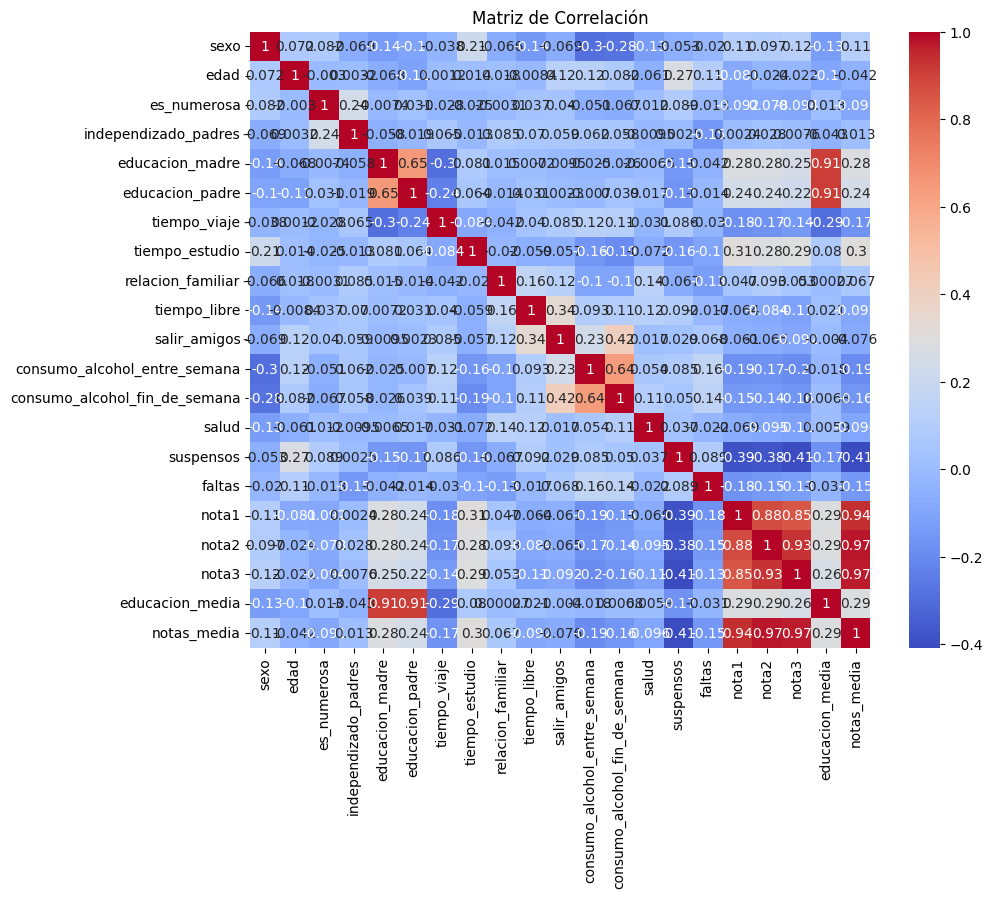

In [23]:
# Calcular la matriz de correlación para las columnas numéricas
corr_matrix = df_numerico.corr()

# Mostrar la matriz de correlación con un heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm'
)
plt.title('Matriz de Correlación')
plt.show()

In [24]:
# Filtrar las correlaciones más significativas con "Calories_Burned"
correlaciones_nota1 = corr_matrix["nota1"].sort_values(ascending=False)
# correlaciones_nota2 = corr_matrix["nota2"].sort_values(ascending=False)
# correlaciones_nota3 = corr_matrix["nota3"].sort_values(ascending=False)

display(correlaciones_nota1)

nota1                            1.000000
notas_media                      0.940686
nota2                            0.875859
nota3                            0.850014
tiempo_estudio                   0.305736
educacion_media                  0.288044
educacion_madre                  0.283714
educacion_padre                  0.239334
sexo                             0.106584
relacion_familiar                0.047265
independizado_padres             0.002439
salir_amigos                    -0.060871
tiempo_libre                    -0.063815
salud                           -0.068663
edad                            -0.080537
es_numerosa                     -0.091574
consumo_alcohol_fin_de_semana   -0.146730
faltas                          -0.175052
tiempo_viaje                    -0.182933
consumo_alcohol_entre_semana    -0.186544
suspensos                       -0.390651
Name: nota1, dtype: float64

Como podemos observar, la variable `educacion_media` que creamos anteriormente tiene una mayor correlación en comparación con `educacion_padre` y `educacion_madre`. Por lo tanto, es importante probar diferentes modelos más adelante para determinar si el modelo funciona mejor utilizando las dos variables originales (`educacion_padre` y `educacion_madre`) o utilizando la variable resumen (`educacion_media`).

Por otro lado, la variable `notas_media`, que combina `nota1`, `nota2` y `nota3`, también resulta un buen indicador. Su alta correlación (0.9407) con `nota1` muestra que consolidar las notas en una sola variable mejora la explicabilidad del modelo. Esto puede ser útil para simplificar el análisis y reducir dimensionalidad sin perder información relevante.

### Eliminacion de variables poco correlacionas
Cuando queremos ver que variables están correlacionadas con la variable objetivo, tenemos que escoger tanto valores lo más cercanos a **1** como a **-1**. Los valores próximos a **0** no nos aportan información relevantes sobre la variable objetivo.

In [25]:
#Eliminar las columnas especificadas
columnas_a_eliminar = [
    'relacion_familiar', 'independizado_padres',
    'salir_amigos', 'tiempo_libre',
    'salud', 'edad'
    
]
df = df.drop(columns=columnas_a_eliminar)

columnas_numericas = df.select_dtypes(include=[np.number]).columns
df.head()

,campus,sexo,entorno_vivienda,es_numerosa,educacion_madre,educacion_padre,ocupacion_madre,ocupacion_padre,razon_matricula,interes_educacion_superior,...,relacion_romantica,consumo_alcohol_entre_semana,consumo_alcohol_fin_de_semana,suspensos,faltas,nota1,nota2,nota3,educacion_media,notas_media
id_estudiante_proy,,,,,,,,,,,,,,,,,,,,,
511,A Coruña,0,urbano,0,4.0,3.0,profesor,servicios,cerca_casa,1,...,0,1.0,1.0,0.0,0.0,14.0,14.0,14.0,3.5,14.000000
377,Vigo,1,rural,1,2.0,2.0,servicios,otro,cerca_casa,1,...,1,1.0,1.0,0.0,5.0,14.0,14.0,15.0,2.0,14.333333
426,A Coruña,0,urbano,1,4.0,2.0,salud,otro,curso,1,...,1,1.0,1.0,0.0,9.0,11.0,10.0,10.0,3.0,10.333333
414,A Coruña,1,urbano,1,2.0,1.0,servicios,otro,curso,1,...,0,1.0,2.0,0.0,2.0,12.0,12.0,15.0,1.5,13.000000
485,Vigo,1,rural,0,1.0,2.0,otro,otro,reputacion_centro,1.0,...,0.0,1.0,4.0,0.0,0.0,14.0,14.0,15.0,1.5,14.333333


#### Análisis por variable

In [26]:
# Crear un DataFrame para almacenar los resultados por variable
resultados_por_variable = []

# Analizar cada variable
for var in columnas_numericas:
    analisis = {
        'Variable': var,
        'Media': df[var].mean(),
        'Mediana': df[var].median(),
        'Desviacion Estandar': df[var].std(),
        'Valor Minimo': df[var].min(),
        'Valor Maximo': df[var].max()
    }
    resultados_por_variable.append(analisis)

# Convertir los resultados a un DataFrame
resultados_por_variable_df = pd.DataFrame(resultados_por_variable)

# Mostrar los resultados
print("Análisis por Variable:")
print(resultados_por_variable_df)

Análisis por Variable:
                         Variable      Media    Mediana  Desviacion Estandar  \
0                            sexo   0.585526   1.000000             0.493443   
1                     es_numerosa   0.750000   1.000000             0.433727   
2                 educacion_madre   2.628289   3.000000             1.141762   
3                 educacion_padre   2.467105   2.000000             1.092536   
4                    tiempo_viaje   1.460526   1.000000             0.638496   
5                  tiempo_estudio   1.927632   2.000000             0.723048   
6    consumo_alcohol_entre_semana   1.299342   1.000000             0.550307   
7   consumo_alcohol_fin_de_semana   2.125000   2.000000             1.165015   
8                       suspensos   0.000000   0.000000             0.000000   
9                          faltas   2.523026   2.000000             2.884944   
10                          nota1  12.184211  12.000000             2.461374   
11               

#### Estandarización y normalización de los datos


In [27]:
# Estandarización 
features = df[columnas_numericas]

scaler_standard = StandardScaler()
features_standardized = scaler_standard.fit_transform(features)
df_standardized = pd.DataFrame(features_standardized, columns=features.columns)

# Mostrar los resultados de la estandarización
print("Estandarización:")
print(df_standardized.head())

Estandarización:
       sexo  es_numerosa  educacion_madre  educacion_padre  tiempo_viaje  \
0 -1.188570    -1.732051         1.203379         0.488564     -0.722456   
1  0.841347     0.577350        -0.551188        -0.428247      0.846306   
2 -1.188570     0.577350         1.203379        -0.428247      0.846306   
3  0.841347     0.577350        -0.551188        -1.345059      0.846306   
4  0.841347    -1.732051        -1.428472        -0.428247      0.846306   

   tiempo_estudio  consumo_alcohol_entre_semana  \
0        1.485568                     -0.544852   
1        1.485568                     -0.544852   
2        0.100253                     -0.544852   
3        0.100253                     -0.544852   
4       -1.285061                     -0.544852   

   consumo_alcohol_fin_de_semana  suspensos    faltas     nota1     nota2  \
0                      -0.967245        0.0 -0.875992  0.738930  0.627412   
1                      -0.967245        0.0  0.860002  0.738930  

In [28]:
# Normalización
scaler_minmax = MinMaxScaler()
features_normalized = scaler_minmax.fit_transform(features)
df_normalized = pd.DataFrame(features_normalized, columns=features.columns)

# Mostrar los resultados de la normalización
print("Normalización:")
print(df_normalized.head())

Normalización:
   sexo  es_numerosa  educacion_madre  educacion_padre  tiempo_viaje  \
0   0.0          0.0             1.00             0.75           0.0   
1   1.0          1.0             0.50             0.50           0.5   
2   0.0          1.0             1.00             0.50           0.5   
3   1.0          1.0             0.50             0.25           0.5   
4   1.0          0.0             0.25             0.50           0.5   

   tiempo_estudio  consumo_alcohol_entre_semana  \
0             1.0                           0.0   
1             1.0                           0.0   
2             0.5                           0.0   
3             0.5                           0.0   
4             0.0                           0.0   

   consumo_alcohol_fin_de_semana  suspensos  faltas     nota1  nota2  \
0                            0.0        0.0     0.0  0.615385    0.6   
1                            0.0        0.0     0.5  0.615385    0.6   
2                            

#### Creación de csv con los nuevos datos
A continuación, se creará un nuevo dataset con los datos procesados.



In [29]:
# Guardar el DataFrame procesado en un archivo CSV
df_standardized.to_csv('EDA/df_standardized.csv', index=False)
df_normalized.to_csv('EDA/df_normalized.csv', index=False)

#### Partición del conjunto de datos
Partición del conjunto de datos en entrenamiento y test.

Este punto se realizará en el notebook siguiente. De esta forma, no se tendrán que exportar la partición de los datos a un nuevo notebook, si no que se realizan las tareas propias del modelo en un notebook diferente.

De esta forma, se posee un primer notebook con todo el análisis y procesamiento previo de los datos